In [ ]:
# Forecasting with Deep-XF

In [ ]:
# install deep-xf library
!pip install deep-xf

     |████████████████████████████████| 9.5 MB 5.6 MB/s 
     |████████████████████████████████| 23.2 MB 1.5 MB/s 
     |████████████████████████████████| 356 kB 48.8 MB/s 
     |████████████████████████████████| 208 kB 46.5 MB/s 
     |████████████████████████████████| 554 kB 50.6 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491649 sha256=fe78bee84ae8f1746f45cfe8214cfa953a358f900fc85dc2d8b689a72d39421e
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
  Created wheel for gatspy: filename=gatspy-0.3-py3-none-any.whl size=43819 sha256=a53bdaa46a62ecf4d048b590056cc065d731825fa8ff466a4ea023016e207cae
  Stored in directory: /root/.cache/pip/wheels/1f/c1/4c/8de278f816259b4f67e2356c0bda260a593375661e400bf31f
Successfully built shap gatspy
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully 

In [ ]:
# import libraries
from deep_xf.main import *
from deep_xf.dpp import *
from deep_xf.forecast_ml_extension import *
from deep_xf.utility import *

Imported DeepXF version:0.0.5. Example call by using:

******************   SET FORECAST MODEL/BASE CONFIGURATIONS   ********************

# select algorithms, scaler, etc.
select_model, select_user_path, select_scaler, forecast_window = Forecast.set_model_config(select_model='rnn', select_user_path='./forecast_folder_path/', select_scaler='minmax', forecast_window=1)

----------------------------------------------------------------------------------

# set variables
ts, fc = Forecast.set_variable(ts='Datetime', fc='PJME_MW')

# get variables
model_df, orig_df = Helper.get_variable(df, ts, fc)

----------------------------------------------------------------------------------

# set hyperparameters
hidden_dim, layer_dim, batch_size, dropout, n_epochs, learning_rate, weight_decay = Forecast.hyperparameter_config(hidden_dim=64,layer_dim = 3, batch_size=64, dropout = 0.2, n_epochs = 30, learning_rate = 1e-3, weight_decay = 1e-6)

-----------------------------------------------------------

In [ ]:
from google.colab import files
data_to_load = files.upload()  # upload sales & marketing data from here - https://github.com/ajayarunachalam/Deep_XF/blob/main/data/Sales_and_Marketing.csv
                               # or alternative read directly from github into the colab notebook

Saving Sales_and_Marketing.csv to Sales_and_Marketing.csv


In [ ]:
# Peek into Sales and Marketing data
import io
df = pd.read_csv(io.BytesIO(data_to_load['Sales_and_Marketing.csv']))

In [ ]:
df.shape

(48, 3)

In [ ]:
df.head(2)

,Time Period,Sales,Marketing Expense
0,2011-01-01,397,486.64
1,2011-02-01,400,501.80


In [ ]:
df.tail(2)

,Time Period,Sales,Marketing Expense
46,2014-11-01,519,527.60
47,2014-12-01,605,559.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time Period        48 non-null     object 
 1   Sales              48 non-null     int64  
 2   Marketing Expense  48 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
# check missing values
print("Missing information for whole dataset")
print("Missing by row", df.apply(Preprocessing.missing, axis=0)) # col
print("Missing by col", df.apply(Preprocessing.missing, axis=1)) # row

Missing information for whole dataset
Missing by row Time Period          0
Sales                0
Marketing Expense    0
dtype: int64
Missing by col 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
dtype: int64


In [ ]:
# set forecasting model configurations - Currently provided tested deep neural networks include ['rnn', 'lstm', 'gru']
select_model, select_user_path, select_scaler, forecast_window = Forecast.set_model_config(select_model='rnn', select_user_path='./FORECAST_MY/', select_scaler='minmax', forecast_window=1)

select_model = rnn
select_user_path = ./FORECAST_MY/
select_scaler = minmax
forecast_window = 1


In [ ]:
# set model hyparameters
hidden_dim, layer_dim, batch_size, dropout, n_epochs, learning_rate, weight_decay = \
Forecast.hyperparameter_config(hidden_dim=5, layer_dim = 3, batch_size=4, dropout = 0.2, \
                               n_epochs = 100, learning_rate = 1e-3, weight_decay = 1e-6)

hidden_dim = 5
layer_dim = 3
batch_size = 4
dropout = 0.2
n_epochs = 100
learning_rate = 0.001
weight_decay = 1e-06


In [ ]:
# set variables
ts, fc = Forecast.set_variable(ts='Time Period', fc='Sales')

ts = Time Period
fc = Sales


In [ ]:
# get variables
model_df, orig_df = Helper.get_variable(df, ts, fc)

In [ ]:
model_df.head(1)

,value,Marketing Expense
Time Period,,
2011-01-01,397,486.64


In [ ]:
orig_df.head(1)

,Time Period,Sales,Marketing Expense
0,2011-01-01,397,486.64


In [ ]:
ExploratoryDataAnalysis.plot_dataset(df=model_df,fc=fc, title='Sales historical data')

In [ ]:
df_full_features = Features.generate_date_time_features_month(model_df, ['month','day_of_week','week_of_year'])

In [ ]:
# generating cyclic features
#df_full_features = Features.generate_cyclic_features(df_full_features, 'hour', 24, 0)
df_full_features = Features.generate_cyclic_features(df_full_features, 'day_of_week', 7, 0)
df_full_features = Features.generate_cyclic_features(df_full_features, 'month', 12, 1)
df_full_features = Features.generate_cyclic_features(df_full_features, 'week_of_year', 52, 0)

In [ ]:
df_full_features = Features.generate_other_related_features(df=df_full_features)

In [ ]:
df_full_features.head(2)

,value,Marketing Expense,sin_day_of_week,cos_day_of_week,sin_month,cos_month,sin_week_of_year,cos_week_of_year,is_holiday
Time Period,,,,,,,,,
2011-01-01,397,486.64,-0.974928,-0.222521,0.0,1.000000,6.432491e-16,1.000000,1
2011-02-01,400,501.80,0.781831,0.623490,0.5,0.866025,5.680647e-01,0.822984,0


In [ ]:
df_full_features_ = df_full_features.drop(columns=['Marketing Expense'])

Train-Val-Test Split
Predictors: Train-(28, 7), Val-(10, 7), Test-(10, 7)
Response: Train-(28, 1), Val-(10, 1), Test-(10, 1)
cpu is available.
[1/100] Training loss: 0.2706	 Validation loss: 0.6896
[2/100] Training loss: 0.2404	 Validation loss: 0.6348
[3/100] Training loss: 0.1984	 Validation loss: 0.5865
[4/100] Training loss: 0.1983	 Validation loss: 0.5460
[5/100] Training loss: 0.1744	 Validation loss: 0.5101
[6/100] Training loss: 0.1509	 Validation loss: 0.4785
[7/100] Training loss: 0.1549	 Validation loss: 0.4513
[8/100] Training loss: 0.1314	 Validation loss: 0.4276
[9/100] Training loss: 0.1313	 Validation loss: 0.4069
[10/100] Training loss: 0.1132	 Validation loss: 0.3888
[11/100] Training loss: 0.1181	 Validation loss: 0.3728
[12/100] Training loss: 0.1127	 Validation loss: 0.3586
[13/100] Training loss: 0.1074	 Validation loss: 0.3460
[14/100] Training loss: 0.1032	 Validation loss: 0.3340
[15/100] Training loss: 0.1004	 Validation loss: 0.3234
[16/100] Training loss: 0.

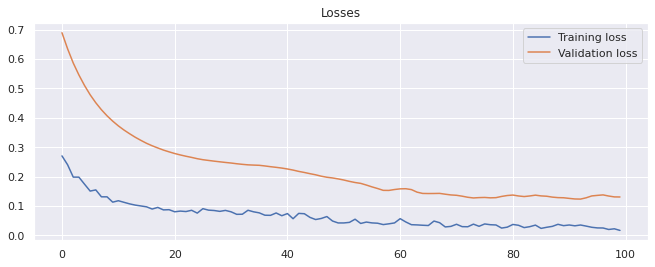

Forecast testset predictions:              value  prediction
Time Period                   
2014-03-01   587.0  494.739838
2014-04-01   710.0  582.240662
2014-05-01   793.0  603.569702
2014-06-01   749.0  619.445740
2014-07-01   871.0  622.449585
2014-08-01   848.0  575.304077
2014-09-01   640.0  524.274963
2014-10-01   581.0  475.045715
2014-11-01   519.0  425.298340
2014-12-01   605.0  428.210876
Mean Absolute Error (MAE):        155.24203
Root Mean Squared Error (RMSE):    166.822030450867
Forecast bias:   		   155.242041015625
Mean Absolute Percentage Error (MAPE):    21.91842269897461
R^2 Score:                  -1.0819606715383903
Explained Variance Score:   0.7209925651550293
Root Mean Squared Relative Error (RMSRE):  0.2264604832080142
Symmetric Mean Absolute Percentage Error (sMAPE):    0.24851027131080627
pcc coefficient:  0.8895724714873464
Model Evaluations: {'mae': 155.24203, 'rmse': 166.822030450867, 'fc_bias': 155.242041015625, 'mape': 21.91842269897461}
Model Evaluation

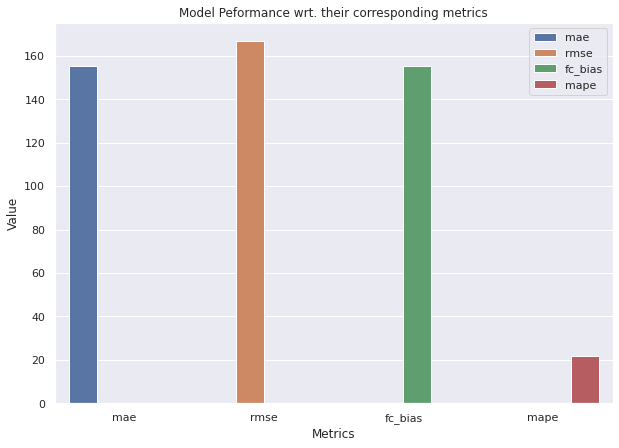

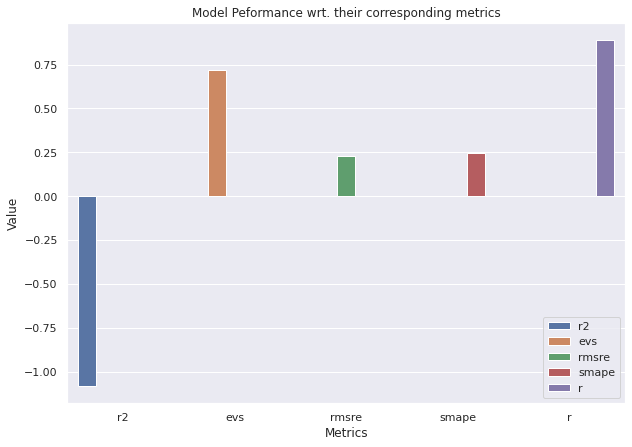

In [ ]:
# train forecasting model
opt, scaler = Forecast.train(df=df_full_features_, target_col='value', split_ratio=0.2, select_model=select_model, \
             select_scaler=select_scaler, forecast_window=forecast_window, batch_size=batch_size,\
            hidden_dim=hidden_dim, layer_dim=layer_dim,dropout=dropout, \
             n_epochs=n_epochs, learning_rate=learning_rate, weight_decay=weight_decay)

Forecast period dataframe: DatetimeIndex(['2014-12-31', '2015-01-31', '2015-02-28', '2015-03-31',
               '2015-04-30', '2015-05-31', '2015-06-30', '2015-07-31',
               '2015-08-31', '2015-09-30', '2015-10-31', '2015-11-30',
               '2015-12-31', '2016-01-31', '2016-02-29', '2016-03-31',
               '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30'],
              dtype='datetime64[ns]', name='Time Period', freq=None)
Tensor size: 24
Forecast period predictions:                   value
Time Period            
2014-12-31   438.671387
2015-01-31   441.149658
2015-02-28   474.807404
2015-03-31   557.816711
2015-04-30   585.207520
2015-05-31   610.442749
2015-06-30   621.329590
2015-07-31   584.255554
2015-08-31   557.798462
2015-09-30   500.756500
2015-10-31   440.932739
2015-11-30   437.315247
2015-12-31   432.677551
2016-01-31   440.692200
2016-02-29   492.000641
2016-03-31   534.035095


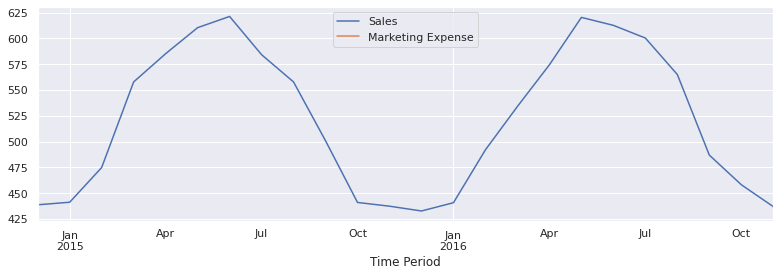

In [ ]:
forecasted_data, ff_full_features, ff_full_features_ = Forecast.forecast(model_df, ts, fc, opt, scaler, period=24, fq='1m', select_scaler=select_scaler,)

Epoch 1/30
2/2 [==============================] - 0s 8ms/step - loss: 575.0335
Epoch 2/30
2/2 [==============================] - 0s 12ms/step - loss: 574.9879
Epoch 3/30
2/2 [==============================] - 0s 7ms/step - loss: 574.9434
Epoch 4/30
2/2 [==============================] - 0s 8ms/step - loss: 574.8979
Epoch 5/30
2/2 [==============================] - 0s 5ms/step - loss: 574.8541
Epoch 6/30
2/2 [==============================] - 0s 4ms/step - loss: 574.8091
Epoch 7/30
2/2 [==============================] - 0s 5ms/step - loss: 574.7641
Epoch 8/30
2/2 [==============================] - 0s 5ms/step - loss: 574.7205
Epoch 9/30
2/2 [==============================] - 0s 8ms/step - loss: 574.6762
Epoch 10/30
2/2 [==============================] - 0s 9ms/step - loss: 574.6317
Epoch 11/30
2/2 [==============================] - 0s 7ms/step - loss: 574.5874
Epoch 12/30
2/2 [==============================] - 0s 8ms/step - loss: 574.5432
Epoch 13/30
2/2 [==============================]

  0%|          | 0/50 [00:00<?, ?it/s]

Current Label Shown: Sales_0



Current Label Shown: Sales_0



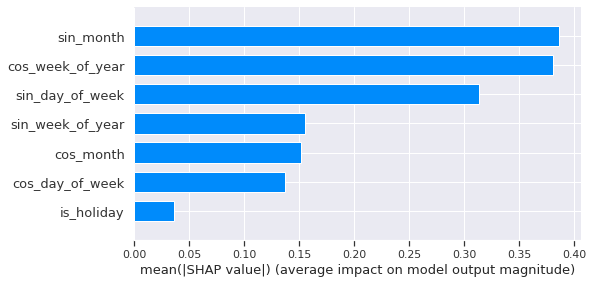

In [ ]:
Helper.explainable_forecast(df_full_features_, ff_full_features_, fc, specific_prediction_sample_to_explain=df_full_features.shape[0]+2, input_label_index_value=0, num_labels=1)